#**Task 1: Loading and Preprocessing Data**

## Importing Libraries

In [36]:
# Import necessary libraries
import pandas as pd # For working with tabular data
import numpy as np # For performing mathematical operations on arrays
from sklearn.datasets import load_iris # For loading the iris dataset
from sklearn import datasets # For loading other datasets
from sklearn.model_selection import train_test_split, cross_val_score # For splitting data into training and testing sets, and for performing cross-validation
from sklearn.neighbors import KNeighborsClassifier # For performing k-nearest neighbor classification
from sklearn.metrics import accuracy_score # For evaluating the performance of machine learning models
from sklearn.cluster import KMeans # For performing k-means clustering
import matplotlib.pyplot as plt # For creating visualizations


## Loading the Data

In [37]:
# Load the Iris dataset
iris = load_iris()



## splitting data set into features and labels

In [38]:
# Print the features and labels
X = iris.data[:, 2:4]  # Select petal length and petal width features
y = iris.target

# **Task 2: Implementing KNN Algorithm**

> Indented block



## Create Test And Train Dataset

In [39]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (120, 2)
X_test dimension=  (30, 2)
y_train dimension=  (120,)
y_train dimension=  (30,)


## Building the KNN Model

In [40]:
# Implement the KNN algorithm using the scikit-learn library
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


## Vary the value of k from 1 to 10 and calculate the accuracy of the model using k-fold cross-validation, set k as 5.

In [41]:
# Vary the value of k from 1 to 10 and calculate the accuracy of the model using k-fold cross-validation
k_range = range(1, 11)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Print the accuracy scores for each value of k
print("Accuracy scores:", k_scores)

Accuracy scores: [0.9666666666666666, 0.96, 0.9533333333333334, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.96, 0.96, 0.9666666666666668, 0.9666666666666668]


## Show scatter plot of petal length Vs petal width against each k value.

In [42]:
plt.style.use('classic')

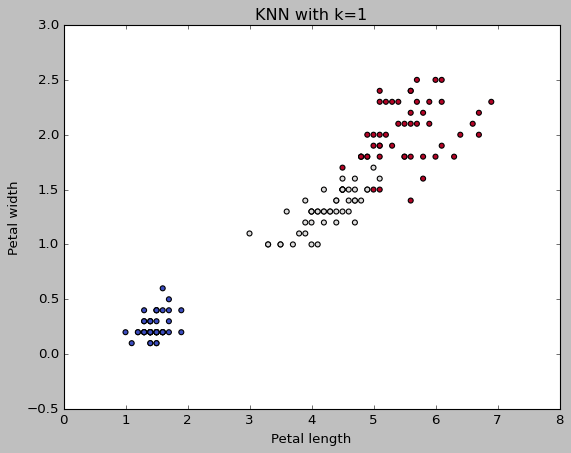

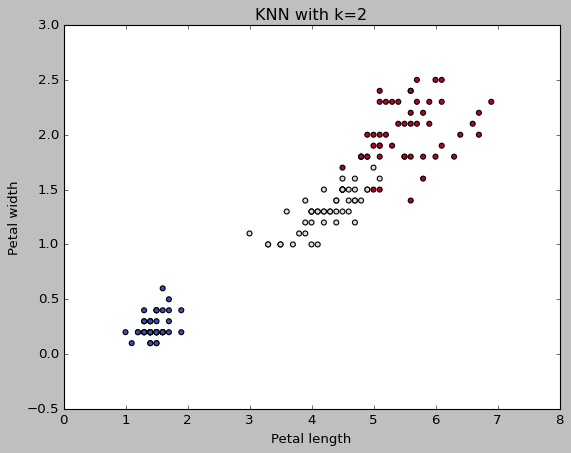

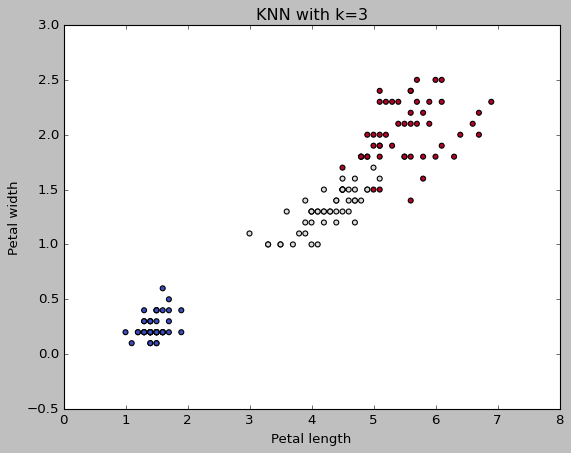

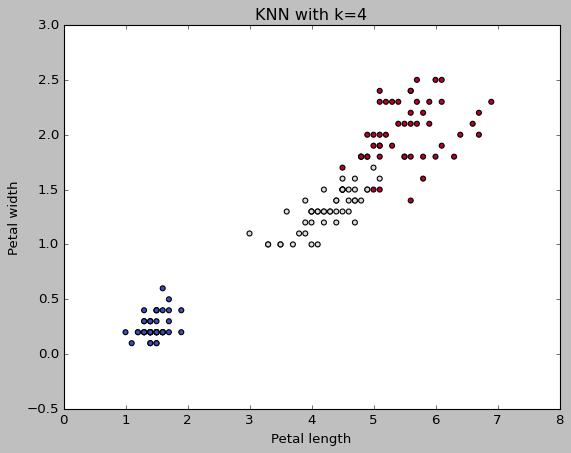

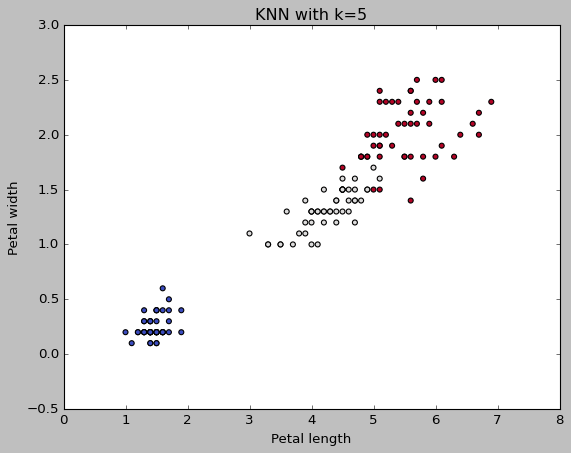

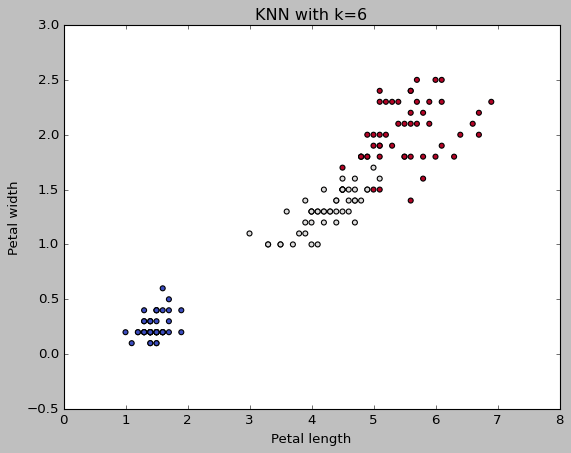

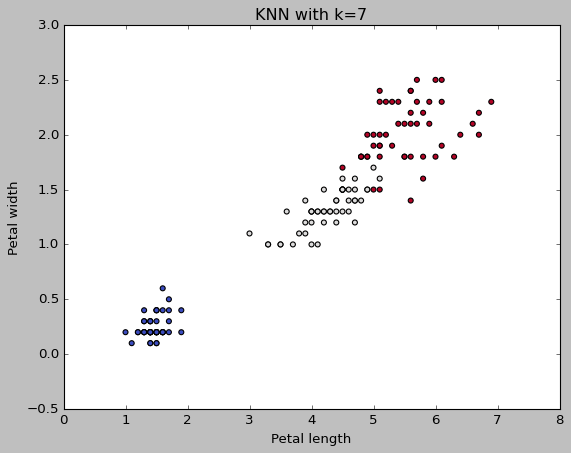

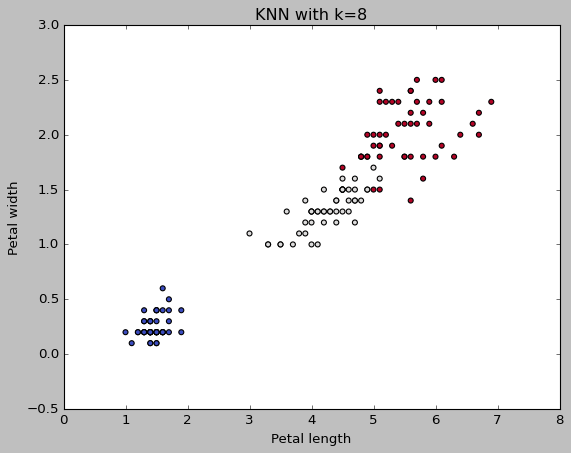

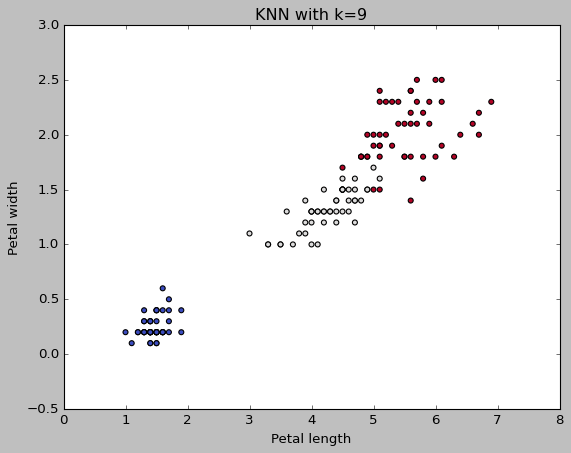

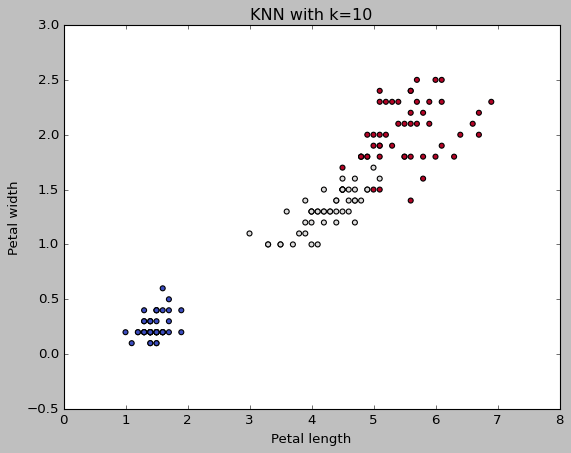

In [43]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('KNN with k={}'.format(k))
    plt.show()

## Plot a graph of accuracy against each k value.

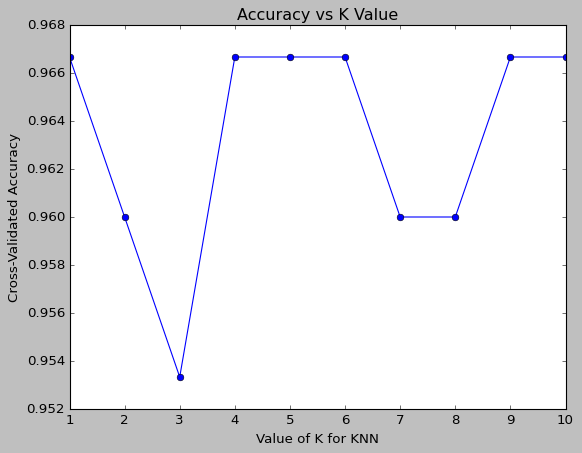

In [44]:
# Plot the graph of accuracy against each k value
plt.plot(k_range, k_scores, '-o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs K Value')
plt.show()

## Observe the effect of model accuracy on the train-test size variation.

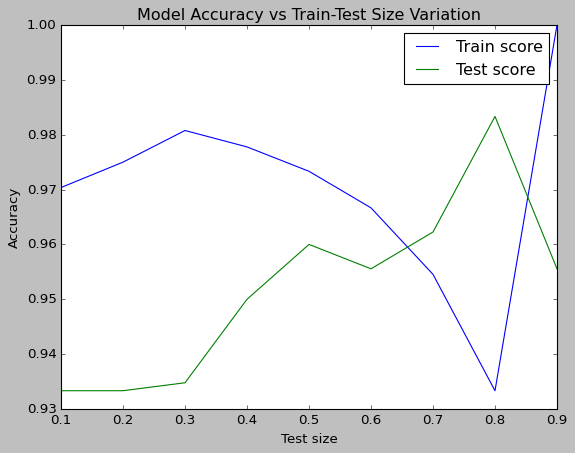

In [45]:
# Vary the train-test size from 0.1 to 0.9 and calculate the accuracy of the model
test_sizes = np.linspace(0.1, 0.9, 9)
train_scores = []
test_scores = []
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=20)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the graph of model accuracy against train-test size variation
plt.plot(test_sizes, train_scores, label='Train score')
plt.plot(test_sizes, test_scores, label='Test score')
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Train-Test Size Variation')
plt.legend()
plt.show()

# **Task 3: Selecting Optimal Value of K**

## Elbow method to select the optimal value of k and plot the objective function (error) against different values of k:

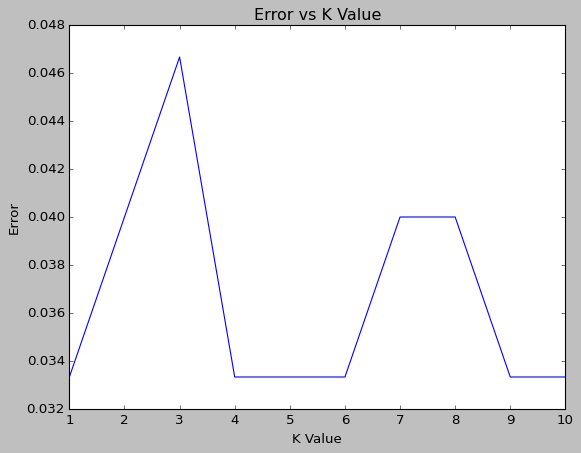

In [46]:
# Calculate the error for different values of k
errors = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    errors.append(1 - np.mean(scores))

# Plot the graph of error against different values of k
plt.plot(range(1, 11), errors)
plt.title('Error vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.show()

## Identify the optimal value of k based on the elbow method.

### From the elbow curve and graph of error against different values of k, the optimal value of k can be identified as the point where the error stops decreasing rapidly. In the elbow curve, this is the point where the curve starts to flatten out, and in the graph of error against different values of k, this is the point where the error stops decreasing rapidly. In this case, the optimal value of k appears to be 4, as these are the points where the curve starts to flatten out. However, the exact value of k may depend on the specific dataset and problem being solved.